# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Hurst Exponent on Multiple Asset Classes

In the previous notebook, you have learned how to calculate the Hurst exponent of time series. In this notebook, you will learn to calculate the Hurst values of securities discussed in the previous sections.

You will perform the following steps:

1. [Read prices from CSV file](#read)
2. [Calculate Hurst exponent](#hurst)<br>
    2.1 [Commodities](#commodities)<br>
    2.2 [Stock indices](#stocks)<br>
    2.3 [Currencies](#currencies)<br>
    2.4 [Treasuries](#bonds)<br>
3. [Filter securities with high Hurst exponent](#higher_hurst)

<a id='read'></a> 
# Read prices from CSV file

In [1]:
# Import the package pandas as pd
import pandas as pd

# The data is stored in the directory 'data'
path = '../data/'

# Read the csv file using read_csv method of pandas
prices = pd.read_csv(path + 'security_prices_2000_2019.csv', index_col=0)

# Set the index to datetime
prices.index = pd.to_datetime(prices.index)

prices.tail()

,Gold,Silver,Crude Oil,Platinum,Corn,Sugar,Wheat,EUR-USD,USD-JPY,GBP-USD,...,GBP-EUR,S&P500,Dow Jones Industrial Average,NASDAQ,Russell 2000,TLT,TLH,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-26,142.380005,16.73,103.120003,89.510002,14.84,7.01,5.76,1.109545,109.369003,1.297353,...,1.16890,321.052124,283.575867,213.335373,166.037979,136.366409,143.870224,110.003388,125.000992,84.119888
2019-12-27,142.330002,16.58,103.279999,88.879997,14.88,7.05,5.82,1.110112,109.542000,1.300221,...,1.17085,320.972565,283.843536,213.155762,165.221146,136.515533,144.009445,110.162628,125.219879,84.179588
2019-12-30,142.630005,16.74,103.120003,90.129997,14.82,7.08,5.80,1.118230,109.428001,1.309192,...,1.17066,319.202972,282.059174,211.758743,164.802765,136.018463,143.691238,110.092964,125.249718,84.209435
2019-12-31,142.899994,16.68,102.480003,90.930000,14.80,7.02,5.85,1.120230,108.873001,1.311303,...,1.17039,319.978424,282.624176,212.157883,165.031876,134.686310,142.816101,109.694862,125.110435,84.199486
2020-01-01,142.899994,16.68,102.480003,90.930000,14.80,7.02,5.85,1.122083,108.681000,1.326260,...,1.18140,319.978424,282.624176,212.157883,165.031876,134.686310,142.816101,109.694862,125.110435,84.199486


<a id='hurst'></a> 
## Calculate Hurst exponent

We create functions `get_hurst` and `hurst_plot` which calculate and plot the Hurst exponent of all securities. We will be using Hurst value of 0.65 as a threshold to filter the securities. We will consider the securities having Hurst value greater or equal to 0.65 as trending securities. 

In [2]:
def get_hurst(series):
    # Calculate Hurst exponent
    hurst_value = compute_Hc(series.dropna(), kind='price')[0]
    return hurst_value


def hurst_plot(hurst_plot_graph, title_name):
    plt.subplots(figsize=(10, 7))

    # Plot hurst exponent
    hurst_plot_graph = ['grey' if (x < 0.65) else 'green' for x in hurst.values]
    seaborn.barplot(x=hurst.index, y=hurst.values, palette=hurst_plot_graph)

    # Set style for the bar graph
    plt.axhline(0.65, color="red")
    plt.title(title_name, fontsize=14)
    plt.ylabel('Hurst Values', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

### Store securities according to their classes 

In [3]:
commodities = ['Gold', 'Silver', 'Crude Oil','Platinum', 'Corn', 'Sugar', 'Wheat']

currencies = ['EUR-USD', 'USD-JPY', 'GBP-USD', 'USD-CAD', 'USD-CHF', 'GBP-EUR']

stock_indices = ['S&P500', 'Dow Jones Industrial Average','NASDAQ', 'Russell 2000']

treasuries = ['TLT', 'TLH', 'IEF', 'IEI', 'SHY']

<a id='commodities'></a> 
## Commodities

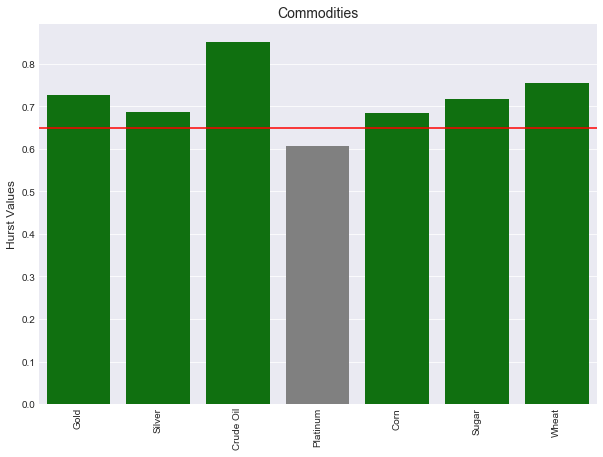

In [4]:
# Import compute_Hc from hurst library
from hurst import compute_Hc

# Import matplotlib and set the style
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Get Hurst exponenet of commodities
hurst = prices[commodities].apply(get_hurst)

# Plot Hurst exponent values
hurst_plot(hurst.sort_values(0), 'Commodities')

Hurst exponent of all the commodities except Platinum is higher than our predefined threshold that is 0.65. Crude oil has the maximum Hurst value among all commodities.

<a id='stocks'></a> 
# Stock Indices

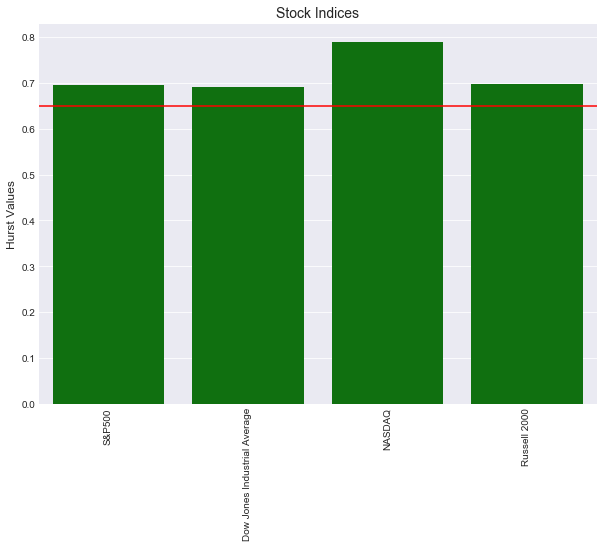

In [5]:
# Get Hurst exponent of stock indices
hurst = prices[stock_indices].apply(get_hurst)
hurst_plot(hurst.sort_values(0), 'Stock Indices')

Hurst exponent of all stock indices are greater than 0.65, NASDAQ being the highest among them.

<a id='currencies'></a> 
## Currencies

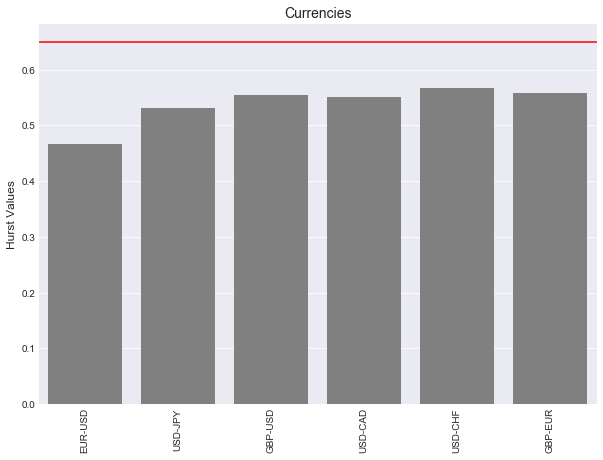

In [6]:
# Get Hurst exponent of currencies
hurst = prices[currencies].apply(get_hurst)
hurst_plot(hurst.sort_values(0), 'Currencies')

All currency pairs have Hurst exponent less than 0.65. Therefore, we will not consider any currency pairs in the time series momentum strategy.

<a id='bonds'></a> 
## Treasuries

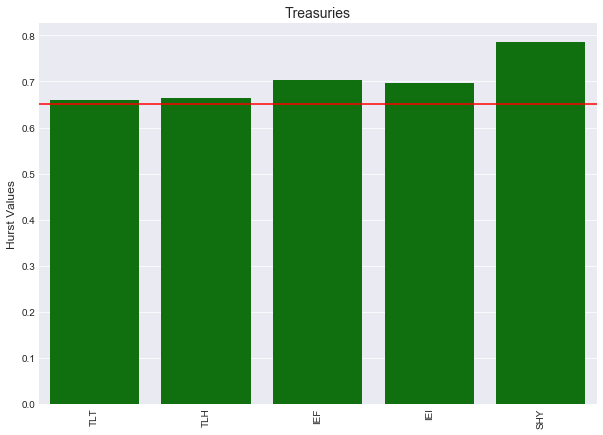

In [7]:
hurst = prices[treasuries].apply(get_hurst)
hurst_plot(hurst.sort_values(0),'Treasuries')

Hurst exponent of all the stock indices are greater than 0.65, SHY being the highest among them.

<a id='higher_hurst'></a> 
## Filter securities with high Hurst exponent

Syntax:
```python
DataFrame.loc[condition]
```

Parameter:

    condition: condition to check
    
Return:
    
    Pandas DataFrame    

In [8]:
data = prices[:]

# Calculate Hurst exponent of all securities
hurst = data.apply(get_hurst)

# Store Hurst exponent in a dataframe
hurst = pd.DataFrame(hurst, columns=['hurst_exponent'])

# Keep only those securities having Hurst value greater than 0.65
filtered_hurst = hurst.loc[hurst['hurst_exponent'] > 0.65].sort_values(
    by='hurst_exponent', ascending=False)

print(filtered_hurst)

                              hurst_exponent
Crude Oil                           0.852324
NASDAQ                              0.789579
SHY                                 0.786669
Wheat                               0.754997
Gold                                0.726369
Sugar                               0.717827
IEF                                 0.702417
Russell 2000                        0.698042
IEI                                 0.696294
S&P500                              0.694677
Dow Jones Industrial Average        0.690858
Silver                              0.687496
Corn                                0.683932
TLH                                 0.664223
TLT                                 0.658736


We know that Hurst exponent greater than 0.5 exhibits trending behaviour. But to find a strong trend in a time series, we set the threshold of 0.65. We will consider only these securities having Hurst exponent greater than 0.65 for momentum strategy.

In the upcoming notebook, you will find the optimal lookback and holding periods for securities having Hurst value higher than 0.65 and create a momentum trading strategy.<br><br>